# AI Scene detection
Using a simple Discriminator network to look at the five frames before a potential cut and the five frames after a potential cut to workout if there is a scene change there.

# Prepare Data
Find a video to convert to frames and split them into scenes by hand. We can work at a 64x64 greyscale image resolution.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import PIL
import PIL.Image
import tensorflow as tf
print(tf.__version__)

2.7.0


In [10]:
import os
import glob
import re
base_path = "./frames"
img_height = 64
img_width = 64
batch_size = 16
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(
        base_path),
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(
        base_path),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 9164 files belonging to 25 classes.
Using 7332 files for training.
Found 9164 files belonging to 25 classes.
Using 1832 files for validation.
['scene_00', 'scene_01', 'scene_02', 'scene_03', 'scene_04', 'scene_05', 'scene_06', 'scene_07', 'scene_08', 'scene_09', 'scene_10', 'scene_11', 'scene_12', 'scene_13', 'scene_14', 'scene_15', 'scene_16', 'scene_17', 'scene_18', 'scene_19', 'scene_20', 'scene_21', 'scene_22', 'scene_23', 'scene_24']


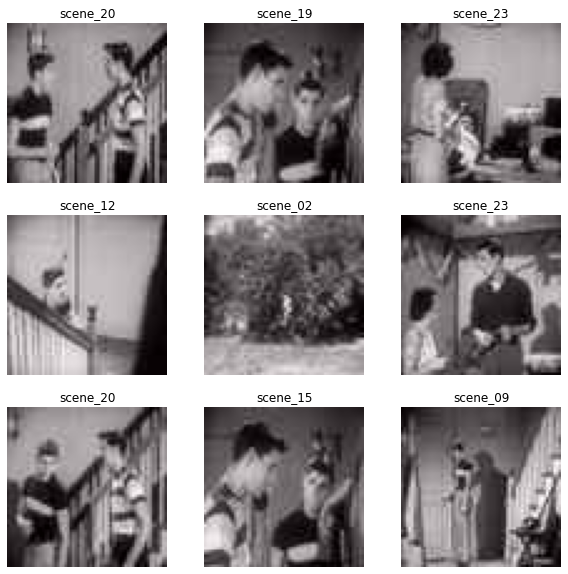

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0
